Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
training epoch 0 batch 0 cost 0.4257811903953552
training epoch 0 batch 100 cost 0.06571662425994873
training epoch 0 batch 200 cost 0.054304398596286774
training epoch 0 batch 300 cost 0.04891471937298775
training epoch 0 batch 400 cost 0.0409056581556797
training epoch 0 batch 500 cost 0.041784536093473434
training epoch 1 batch 0 cost 0.0395355299115181
tra

Text(0.5,0,'epochs')

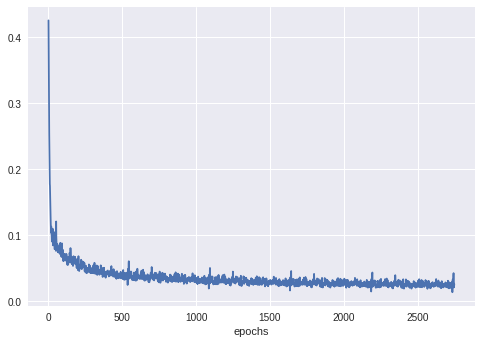

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import math
#get_ipython().magic('matplotlib inline')

mnist = input_data.read_data_sets("MNIST_data/")
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

class AutoEncoder(object):
  def __init__(self, m, n, eta = 0.01):
    # m: Number of neurons in input/output layer
    # n: number of neurons in hidden layer
    self._m = m
    self._n = n
    self.learning_rate = eta

    # Create the Computational graph
    # Weights and biases
    self._W1 = tf.Variable(tf.random_normal(shape=(self._m,self._n)))
    self._W2 = tf.Variable(tf.random_normal(shape=(self._n,self._m)))
    self._b1 = tf.Variable(np.zeros(self._n).astype(np.float32))  #bias for hidden layer
    self._b2 = tf.Variable(np.zeros(self._m).astype(np.float32))  #bias for output layer

    # Placeholder for inputs
    self._X = tf.placeholder('float', [None, self._m])


    self.y = self.encoder(self._X)
    self.r = self.decoder(self.y)
    error = self._X - self.r

    self._loss = tf.reduce_mean(tf.pow(error, 2))
    self._opt = tf.train.AdamOptimizer(self.learning_rate).minimize(self._loss)

  def encoder(self, x):
    h = tf.matmul(x, self._W1) + self._b1
    return tf.nn.sigmoid(h)

  def decoder(self, x):
    h = tf.matmul(x, self._W2) + self._b2
    return tf.nn.sigmoid(h)

  def set_session(self, session):
    self.session = session

  def reduced_dimension(self, x):
    h = self.encoder(x)
    return self.session.run(h, feed_dict={self._X: x})

  def reconstruct(self,x):
    h = self.encoder(x)
    r = self.decoder(h)
    return self.session.run(r, feed_dict={self._X: x})
  
  def getWeights(self):
    return self.session.run([self._W1, self._W2,self._b1, self._b2])

  def fit(self, X, epochs = 1, batch_size = 100):
    N, D = X.shape
    num_batches = N // batch_size

    obj = []
    for i in range(epochs):
      #X = shuffle(X)
      for j in range(num_batches):
        batch = X[j * batch_size: (j * batch_size + batch_size)]
        _, ob = self.session.run([self._opt,self._loss], feed_dict={self._X: batch})
        if j % 100 == 0:
          print('training epoch {0} batch {2} cost {1}'.format(i,ob, j))
        obj.append(ob)
    return obj

n_hidden = 256
Xtrain = trX.astype(np.float32)
Xtest = teX.astype(np.float32)
_, m = Xtrain.shape

autoEncoder = AutoEncoder(m, n_hidden)

#Initialize all variables
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  autoEncoder.set_session(sess)
  err = autoEncoder.fit(Xtrain, epochs=5)
  out = autoEncoder.reconstruct(Xtest[0:100])
  W1, W2, b1, b2 = autoEncoder.getWeights()

plt.plot(err)
plt.xlabel('epochs')

  